In [1]:
#pip install pandas

In [2]:
#pip install scikit-learn

In [3]:
import pandas as pd

In [4]:
import seaborn as sns

In [5]:
import matplotlib.pyplot as plt

In [6]:
import numpy as np

In [7]:
from sklearn.preprocessing import StandardScaler

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
data=pd.read_csv("data/diabetes.csv")

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [11]:
(data["Glucose"]==0).sum()

np.int64(5)

In [12]:
columns_zero= ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]

for col in columns_zero:
    median = data[col].median()
    data[col] = data[col].replace(0, median)

In [13]:
X = data.drop("Outcome", axis=1)
y = data["Outcome"]


In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
scaler = StandardScaler()

In [16]:
X_train_scaled = scaler.fit_transform(X_train)

In [17]:
X_test_scaled = scaler.transform(X_test)

In [18]:
from sklearn.ensemble import RandomForestClassifier

In [19]:
model = RandomForestClassifier(
    n_estimators=200,
    max_depth=12,
    min_samples_leaf=3,
    class_weight={0:1, 1:2},
    random_state=42
)

In [20]:
model.fit(X_train_scaled, y_train)

RandomForestClassifier(class_weight={0: 1, 1: 2}, max_depth=12,
                       min_samples_leaf=3, n_estimators=200, random_state=42)

In [21]:
y_prob = model.predict_proba(X_test_scaled)[:, 1]
y_pred = (y_prob >= 0.40).astype(int)

In [22]:
from sklearn.metrics import classification_report, confusion_matrix
print("\n Test Report:\n", classification_report(y_test, y_pred))


 Test Report:
               precision    recall  f1-score   support

           0       0.88      0.67      0.76        99
           1       0.58      0.84      0.69        55

    accuracy                           0.73       154
   macro avg       0.73      0.75      0.72       154
weighted avg       0.77      0.73      0.73       154



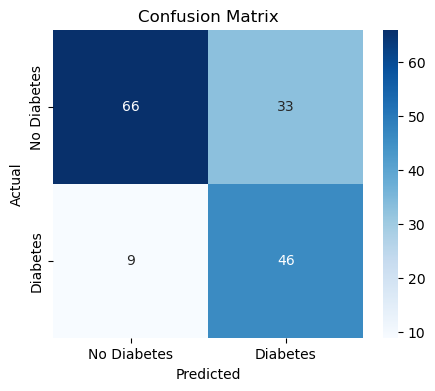

In [23]:
cm=confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=["No Diabetes", "Diabetes"],
    yticklabels=["No Diabetes", "Diabetes"]
)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [24]:
import joblib

In [25]:
joblib.dump(model, "model/diabetes_model.pkl")

['model/diabetes_model.pkl']

In [26]:
joblib.dump(scaler, "model/scaler_dia.pkl")

['model/scaler_dia.pkl']